In [1]:
import numpy as np
import matplotlib.pyplot as plt

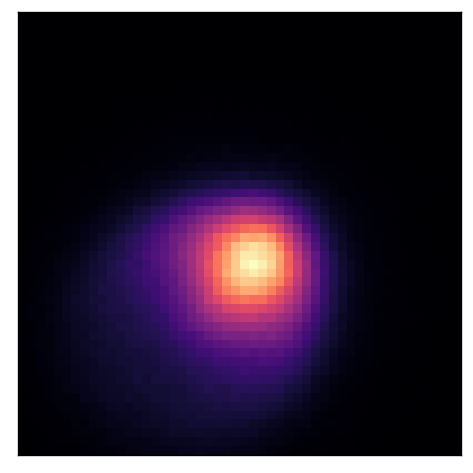

In [22]:
image1=np.load('image_ip.npy')
img = image1[2125:2175, 2475:2525]
fig, ax  = plt.subplots(dpi=120)
ax.imshow(img, origin="lower", cmap="magma")
ax.set(xticks=[], yticks=[])

plt.show()

In [24]:
translation1=np.load('trans_ip.npy')
translation1

array([-9.18052952e-04, -9.66944729e-04,  6.26540478e-05])

In [26]:
rotation1=np.load('rot_ip.npy')
rotation1

array([[ 1.00000000e+00,  0.00000000e+00,  6.20381796e-06],
       [ 1.48973187e-10,  1.00000000e+00, -2.40131461e-05],
       [-6.20381796e-06,  2.40131461e-05,  1.00000000e+00]])

In [57]:
x={}
for i in range(2):
    a=i
    x[a]=i**2
    np.save('testing_'+str(i), x[a])

In [40]:
x[2]

4

In [7]:
t0=np.load('trans_0.npy')
t1=np.load('trans_1.npy')
t2=np.load('trans_2.npy')

In [8]:
t0

array([-9.18052952e-04, -9.66944729e-04,  6.26540478e-05])

In [9]:
t1

array([-9.18052952e-04, -9.66944729e-04,  6.26540478e-05])

In [10]:
rot1=np.load('rot_1.npy')
img = image1[2125:2175, 2475:2525]
fig, ax  = plt.subplots(dpi=120)
ax.imshow(img, origin="lower", cmap="magma")
ax.set(xticks=[], yticks=[])

plt.show()

NameError: name 'image1' is not defined

In [16]:
import numpy as np 
import matplotlib.pyplot as plt 

import batoid
import galsim
import wfsim

auxtel0 = batoid.Optic.fromYaml("AuxTel.yaml")
bandpass = galsim.Bandpass("LSST_r.dat", wave_type='nm')

obs_params = {
    "zenith": 30 * galsim.degrees,
    "raw_seeing": 0.7 * galsim.arcsec,
    "temperature": 293, 
    "pressure": 69, 
    "H2O_pressure": 1, 
    "wavelength": bandpass.effective_wavelength,
    "exptime": 30, 
}
atm_params = {
    "screen_size": 819.2,
    "screen_scale": 0.1,
    "nproc": 6,
}

def create_simulator(telescope: batoid.Optic) -> wfsim.SimpleSimulator:
   
    rng = np.random.default_rng(42)

    simulator = wfsim.SimpleSimulator(
        obs_params,
        atm_params,
        telescope,
        bandpass,
        shape=(4000, 4000),
        rng=rng,
    )

    return simulator


Trans_data={}
Rot_data={}
image={}
for i in range(4):
    a=i
    rng = np.random.default_rng(0)
    thx = np.deg2rad(0)
    thy = np.deg2rad(0)
    star_temp = rng.uniform(4_000, 10_000) 
    sed = wfsim.BBSED(star_temp) 
    flux = rng.integers(1_000_000, 2_000_000)


    Trans_data[a] = np.array([
    rng.uniform(-0.001, 0.001),  # meters
    rng.uniform(-0.001, 0.001),
    rng.uniform(-0.0001, 0.0001),
])
    Rot_data[a] = (
    batoid.RotX(np.deg2rad(rng.uniform(-0.1, 0.1)/60)) @
    batoid.RotY(np.deg2rad(rng.uniform(-0.1, 0.1)/60))
)
    intra_perturbed = (
    auxtel0
    .withGloballyShiftedOptic("M2", Trans_data[a])
    .withLocallyRotatedOptic("M2", Rot_data[a])
)

In [22]:
star_temp

7821.770123928725

In [18]:
Trans_data[1]

array([-9.18052952e-04, -9.66944729e-04,  6.26540478e-05])

In [40]:
import numpy as np # standard package for doing calculations
import matplotlib.pyplot as plt # standard package for plotting

import batoid
import galsim
import wfsim

In [42]:
auxtel0 = batoid.Optic.fromYaml("AuxTel.yaml")
bandpass = galsim.Bandpass("LSST_r.dat", wave_type='nm')
rng = np.random.default_rng(0)
Trans_data={}
Rot_data={}
image={}
for i in range(4):
    a=i
    thx = np.deg2rad(0)
    thy = np.deg2rad(0)
    star_temp = rng.uniform(4_000, 10_000) 
    sed = wfsim.BBSED(star_temp) 
    flux = rng.integers(1_000_000, 2_000_000)


    Trans_data[a] = np.array([
    rng.uniform(-0.001, 0.001),  # meters
    rng.uniform(-0.001, 0.001),
    rng.uniform(-0.0001, 0.0001),
])
    Rot_data[a] = (
    batoid.RotX(np.deg2rad(rng.uniform(-0.1, 0.1)/60)) @
    batoid.RotY(np.deg2rad(rng.uniform(-0.1, 0.1)/60))
)
    intra_perturbed = (
    auxtel0
    .withGloballyShiftedOptic("M2", Trans_data[a])
    .withLocallyRotatedOptic("M2", Rot_data[a])
)

In [48]:
intra_perturbed

CompoundOptic([Baffle(Plane(), obscuration=ObscCircle(0.2115), name='Baffle_M2c', coordSys=CoordSys(array([0. , 0. , 2.7]), array([[1., 0., 0.], [0., 1., 0.], [0., 0., 1.]])), inMedium=Air(69.328, 293.15, 1.067), outMedium=Air(69.328, 293.15, 1.067)), Baffle(Plane(), obscuration=ObscNegation(ObscCircle(0.6)), name='Baffle_M1', coordSys=CoordSys(array([0.     , 0.     , 0.04768]), array([[1., 0., 0.], [0., 1., 0.], [0., 0., 1.]])), inMedium=Air(69.328, 293.15, 1.067), outMedium=Air(69.328, 293.15, 1.067)), Mirror(Quadric(6.605995, -1.007514), obscuration=ObscNegation(ObscCircle(0.635)), name='M1', coordSys=CoordSys(array([0., 0., 0.]), array([[1., 0., 0.], [0., 1., 0.], [0., 0., 1.]])), inMedium=Air(69.328, 293.15, 1.067), outMedium=Air(69.328, 293.15, 1.067)), Baffle(Plane(), obscuration=ObscNegation(ObscCircle(0.125)), name='Baffle_M2a', coordSys=CoordSys(array([0.      , 0.      , 2.692074]), array([[1., 0., 0.], [0., 1., 0.], [0., 0., 1.]])), inMedium=Air(69.328, 293.15, 1.067), out